In [1]:
library(ggplot2)
library(nlme)
library(dplyr)
require(splines)
require(geepack)
require(mgcv)
library(knitr)
library(markdown)


Attaching package: 'dplyr'

The following object is masked from 'package:nlme':

    collapse

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: splines
Loading required package: geepack
Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, : there is no package called 'geepack'Loading required package: mgcv
This is mgcv 1.8-7. For overview type 'help("mgcv-package")'.


In [9]:
basePath = '/Users/Ulric/Source/Repos/r/wow_defense/'

In [12]:
source(paste(basePath, 'get_data.R', sep=''))
source(paste(basePath, '../wow_explore_data/utils.R', sep=''))

Loading required package: RODBC


In [13]:
scipenSetting = getOption("scipen") # 0 
digitsSetting = getOption("digits") # 7
options("scipen"=100, digits=3)

In [15]:
START_TS="2013-10-01"
END_TS="2015-04-30"
TIME2_DATE = "2014-04-01"
TIME3_DATE = "2015-10-01"
sqlFilePath = paste(basePath, '../../mySQL/wowtracker/data_monthly.sql', sep='')

# download
monthlyLogins = downloadData(sqlFilePath, START_TS, END_TS, TIME2_DATE, TIME3_DATE)

# clean the data
monthlyLogins = cleanData(monthlyLogins)

# impute missing data
monthlyLogins = imputeMissingData(monthlyLogins)

# Create month variable
monthlyLogins$month_cont_zeroed = monthlyLogins$month_cont - min(monthlyLogins$month_cont)
monthlyLogins$month_cont_centered = monthlyLogins$month_cont - ((max(monthlyLogins$month_cont) + min(monthlyLogins$month_cont))/2)
monthlyLogins$month_cont_normed = monthlyLogins$month_cont_centered / max(monthlyLogins$month_cont_centered, na.rm = TRUE)

# Create orthogonal polynomial time variable
orthogonalMonth = poly(unique(monthlyLogins$month_cont_centered), order=6, raw=FALSE)
monthlyLogins[,paste("month_orth", 1:6, sep="")] = orthogonalMonth[monthlyLogins$month_cont_centered+10, 1:6]

ERROR: Error in `$<-.data.frame`(`*tmp*`, "assist_injection_t2", value = numeric(0)): replacement has 0 rows, data has 10602


In [17]:
head(monthlyLogins)

,user_id,dt,y,monthName,m,month_cont,num_logins,num_weekday_logins,num_weekend_logins,level,ellip.h,draenor_play_early.1,month_cont_zeroed,month_cont_centered,month_cont_normed,month_orth1,month_orth2,month_orth3,month_orth4,month_orth5,month_orth6
1,R_00qR7vX7aujCgPX,2013-10-01,2013,October,10,10,0,0,0,NA,<8b>,0,0,-9,-1,-0.377,0.438,-0.442,0.405,-0.342,0.268
2,R_00qR7vX7aujCgPX,2013-11-01,2013,November,11,11,0,0,0,NA,<8b>,0,1,-8,-0.889,-0.335,0.292,-0.147,-0.045,0.228,-0.357
3,R_00qR7vX7aujCgPX,2013-12-01,2013,December,12,12,0,0,0,NA,<8b>,0,2,-7,-0.778,-0.293,0.163,0.0606,-0.257,0.328,-0.247
4,R_00qR7vX7aujCgPX,2014-01-01,2014,January,1,13,0,0,0,NA,<8b>,0,3,-6,-0.667,-0.251,0.0515,0.193,-0.299,0.194,0.0473
5,R_00qR7vX7aujCgPX,2014-02-01,2014,February,2,14,0,0,0,NA,<8b>,0,4,-5,-0.556,-0.209,-0.0429,0.26,-0.234,-0.01,0.249
6,R_00qR7vX7aujCgPX,2014-03-01,2014,March,3,15,0,0,0,NA,<8b>,0,5,-4,-0.444,-0.168,-0.12,0.273,-0.111,-0.181,0.273


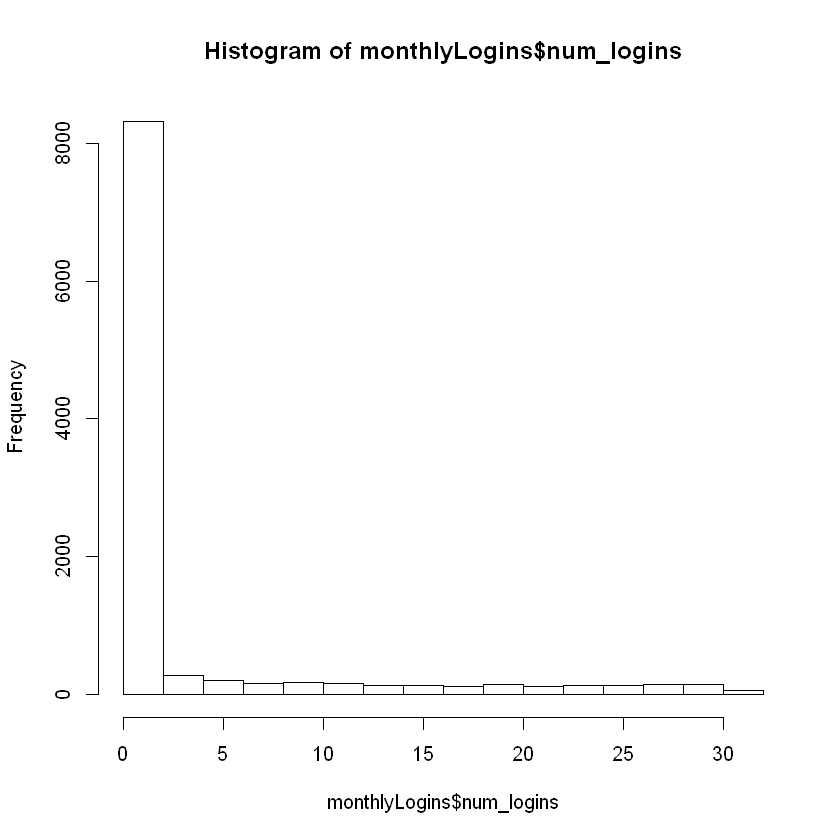

In [18]:
hist(monthlyLogins$num_logins)

In [19]:
ncol(monthlyLogins)

[1] 111

In [20]:
nrow(monthlyLogins)

[1] 10602

In [27]:
totalLogins = aggregate(monthlyLogins$num_logins, by=list(monthlyLogins$user_id), FUN=sum, na.rm=TRUE)

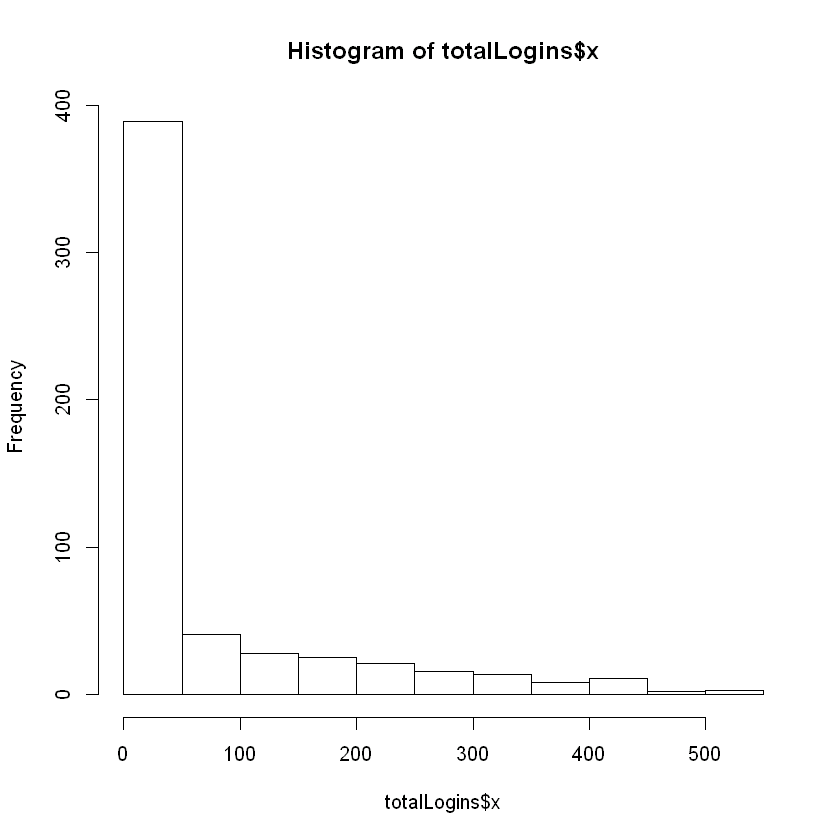

In [31]:
hist(totalLogins$x)

In [47]:
length(totalLogins[totalLogins$x > 15*19, 'x'])

[1] 40

In [45]:
summary(monthlyLogins$month_cont_centered)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     -9      -5       0       0       5       9 

In [ ]:
summary(monthlyLogins$month_cont_centered)

# Iris data set

In [1]:
library(datasets)

In [14]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [15]:
library(ggplot2)

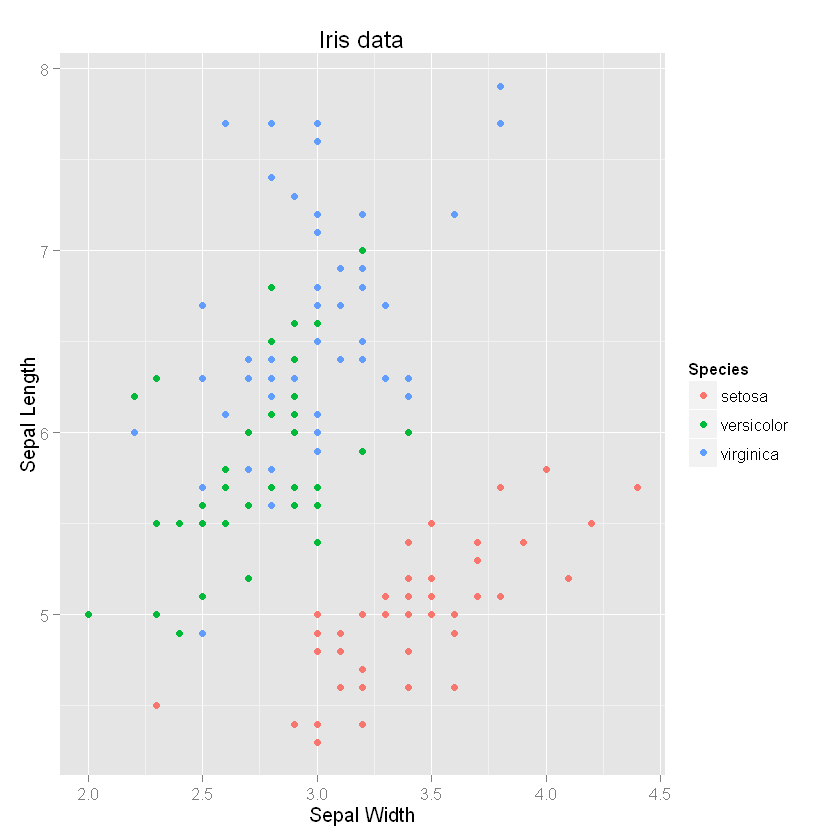

In [23]:
ggplot(data = iris, mapping = aes(x = Sepal.Width, y=Sepal.Length, color=Species)) +
    geom_point() +
    labs(title="Iris data", x="Sepal Width", y="Sepal Length")